# TasteRank: Personalized Image Search and Recommendation
Nicholas Asker  (nga2120@columbia.edu)  
Repository: https://github.com/N-G-Asker/TasteRank

Skip ahead to the [Run Experiment](#run-experiment) section if you wish to use the same generated lists of preferences, descriptors, and match classes that I used for experiments. These are available in the GitHub repository in the folder `setup` $-$ download the three `json` files there, then upload to your Colab workspace to execute the experiment.

Otherwise, continue to [Experimental Setup](#experimental-setup) to generate your own lists, using the same setup methodology as me.

The whole notebook is not intended to be run all at once, but rather in parts, since the runtime required in each section differs.

## Experimental Setup

__Warning__: For runtime, use the T4 GPU __with high-memory toggled on__ to avoid crashing your Colab instance due to out-of-memory errors.

### Function Library
Get the project code for generating with the LLM and processing outputs.

In [1]:
!git clone https://github.com/N-G-Asker/TasteRank.git
# copy project code into current directory for easier access/imports
!cp -av /content/TasteRank/* /content/
!pip --quiet install -r requirements.txt

Cloning into 'TasteRank'...
remote: Enumerating objects: 48, done.
remote: Counting objects: 100% (48/48), done.
remote: Compressing objects: 100% (37/37), done.
remote: Total 48 (delta 18), reused 36 (delta 10), pack-reused 0
Receiving objects: 100% (48/48), 1.72 MiB | 32.10 MiB/s, done.
Resolving deltas: 100% (18/18), done.
'/content/TasteRank/investigate_tests.py' -> '/content/investigate_tests.py'
'/content/TasteRank/README.md' -> '/content/README.md'
'/content/TasteRank/requirements.txt' -> '/content/requirements.txt'
'/content/TasteRank/results' -> '/content/results'
'/content/TasteRank/results/ALL_264_hybrid_test_results_2024-04-20_04-10-50.json' -> '/content/results/ALL_264_hybrid_test_results_2024-04-20_04-10-50.json'
'/content/TasteRank/results/ALL_264_non-hybrid_results_2024-04-20_21-53-31.json' -> '/content/results/ALL_264_non-hybrid_results_2024-04-20_21-53-31.json'
'/content/TasteRank/run_experiment.py' -> '/content/run_experiment.py'
'/content/TasteRank/setup' -> '/conte

### Load the LLM
To use the defualt LLM model model_id="mistralai/Mistral-7B-v0.1", which became gated on HuggingFace part-way through my project, use the following resources to get access and add a secret token to your Colab session:
- https://huggingface.co/docs/hub/security-tokens
- https://huggingface.co/docs/hub/models-gated
- Instructions on the Secrets tab (key button) in Colab

The project codebase assumes you have named the secret in your Google Colab userdata 'HF' (short for HuggingFace).

In [2]:
from set_up_experiment import LLM

# LOAD THE LLM
llm = LLM()

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/25.1k [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/9.94G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/4.54G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/967 [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/493k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.80M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/72.0 [00:00<?, ?B/s]

### Generate Pool of Target Preferences

In [3]:
# For 20 iterations, prompt the LLM for preferences and collect the responses
# Output is expected to contain around 300 generated items (number will vary)
# Estimaed runtime: 5 minutes
preferences = llm.get_all_responses(mode="preferences", colab_download=True)

# # If you instead want to load a previously-generated output instead of generating again,
# # uncomment the below two lines but comment out the top line
# preferences_file = "preferences_responses_2024-04-16_04-46-44.json"
# preferences = load_preferences(preferences_file)

25.0% completed
50.0% completed
75.0% completed
100.0% completed
Saving responses to JSON file preferences_responses_2024-05-05_17-23-38.json...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [4]:
# view the preferences
for i, item in enumerate(preferences):
    print(f"{i}.", preferences[i])

0. only eat one specific fruit (for example apples)
1. only eat one specific vegetable (for example celery)
2. only eat one specific cuisine (for example mexican)
3. avoid meat
4. avoid fruit
5. avoid vegetables
6. avoid spicy dishes
7. avoid saucy dishes
8. avoid fried food
9. avoid salty food
10. avoid sugary foods
11. try something from their country
12. get a dessert toppings buffet
13. get spicy food
14. have something that reminds them of their childhood
15. get something that has been on the menu a long time
16. find a dish that includes potatoes
17. try something that smells like an ocean
18. get a baked meal
19. get something that has been pickled
20. have a sweet and salty dessert
21. try something made with an animal product
22. get a dish that comes with a sauce
23. get a drink that has been infused with other flavor
24. have a dessert platter
25. have a sweet dessert
26. get something from another country
27. eat raw sushi
28. eat an orange
29. eat dessert
30. diet
31. dri


### Determine Preference-Matching Classes

In [5]:
# Get all matching classes, one set per preference
# Estimated runtime when preferences contains around 300 items: 120 minutes
matching_classes = llm.get_matching_classes(preferences, colab_download=True)

# # If you instead want to load a previously-generated output instead of generating again,
# # uncomment the below two lines but comment out the top line
# matching_classes_file = "matching_classes_responses_2024-04-17_04-29-00.json"
# matching_classes = load_responses(matching_classes_file)

100%|██████████| 277/277 [1:52:24<00:00, 24.35s/it]

Saving responses to JSON file matching_classes_responses_2024-05-05_19-19-22.json...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [6]:
from set_up_experiment import show_responses
# View the generated matching classes
show_responses(matching_classes)

Streaming output truncated to the last 5000 lines.
mussels
sashimi
scallops
seaweed_salad
sushi
tuna_tartare



try something new and exciting
baklava
beef_carpaccio
beef_tartare
beet_salad
beignets
bibimbap
breakfast_burrito
bruschetta
ceviche
chicken_curry
chicken_wings
chocolate_mousse
churros
cup_cakes
dumplings
edamame
eggs_benedict
escargots
falafel
filet_mignon
foie_gras
fried_calamari
gnocchi
grilled_salmon
guacamole
gyoza
hot_and_sour_soup
huevos_rancheros
hummus
lobster_bisque
lobster_roll_sandwich
macarons
miso_soup
mussels
oysters
pad_thai
paella
panna_cotta
peking_duck
pho
red_velvet_cake
risotto
samosa
sashimi
scallops
seaweed_salad
shrimp_and_grits
spring_rolls
strawberry_shortcake
sushi
tacos
takoyaki
tuna_tartare
waffles



be adventurous
baby_back_ribs
baklava
beef_carpaccio
beef_tartare
beet_salad
bibimbap
breakfast_burrito
bruschetta
carrot_cake
ceviche
cheese_plate
chicken_curry
chicken_wings
chocolate_mousse
churros
croque_madame
dumplings
edamame
eggs_benedict
es

### Generate Descriptors

In [7]:
from set_up_experiment import filter_preferences
preferences = filter_preferences(preferences, matching_classes, colab_download=True)

len(preferences)=231
Saving responses to JSON file preferences_filtered_2024-05-05_19-19-29.json...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [8]:
# # uncomment below two lines to load (already filtered) preferences from a
# # previously saved file
# preferences_file = "preferences_filtered_2024-04-18_21-52-49.json"
# preferences = load_preferences(preferences_file)

# Get a descriptors list corresponding to each preference
# Estimated Runtime for filtered preferences list of length ~300 items: 22 minutes
descriptors = llm.get_all_responses(preferences, mode="descriptors", colab_download=True)

# # If you instead want to load a previously-generated output instead of generating again,
# # uncomment the below two lines but comment out the line above before running.
# descriptors_file = "descriptors_responses_2024-04-17_18-17-19.json"
# descriptors = load_responses(descriptors_file)

100%|██████████| 231/231 [16:36<00:00,  4.31s/it]

Saving responses to JSON file descriptors_responses_2024-05-05_19-36-13.json...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [9]:
from set_up_experiment import show_responses
# view generated descriptors
show_responses(descriptors)




avoid meat
Vegetable main dishes
Veggie subs
Wholesome vegetable side dish
Meatless dishes for omnivores



avoid spicy dishes
Mild appetizers
Mild soups & salads
Mild main dishes
Mild desserts
Mild drinks



avoid saucy dishes
Meats and seafood, cooked dry
Greens and grains, served dry



avoid fried food
Boiled meats
Fresh produce
Baked goods
Stir-fry dishes
Tortilla-wrapped food



avoid salty food
Fresh produce
Mineral-rich foods
Unseasoned foods
Homemade fare



avoid sugary foods
Baked goods
Sweet snacks
Sips for desserts



try something from their country
Authentic
Homemade
Family-owned
Street food
Artisan



get a dessert toppings buffet
Creamy yogurts
Fruity toppings
Ice cream
Baked treats



get spicy food
Mexican
Indian
Southeast Asian
Korean
Japanese
Sichuanese
Hunan
Thai
Ethiopian
Cajun
Hot and spicy



have something that reminds them of their childhood
Breakfast cereals
Soups and stews
Cake and cookies
Homemade dinners



get something that has been on the menu a lon

__Warning__: Be sure to save all JSON outputs to your local machine if they were not automatically downloaded.

## Run Experiment

__Note__: You must be connected to a T4 GPU runtime (or an alternative GPU runitme with more memory).

It is recommended to restart the session (Runtime > Restart Session) if you are coming from the above section [Experimental Setup](#experimental-setup), as GPU memory will be near full.

### Function Library
Get the project code for running the experiment.

In [1]:
!git clone https://github.com/N-G-Asker/TasteRank.git
# copy project code into current directory for easier access/imports
!cp -av /content/TasteRank/* /content/
!pip --quiet install -r requirements.txt
!pip --quiet install git+https://github.com/openai/CLIP.git

Cloning into 'TasteRank'...
remote: Enumerating objects: 59, done.
remote: Counting objects: 100% (59/59), done.
remote: Compressing objects: 100% (46/46), done.
remote: Total 59 (delta 24), reused 41 (delta 12), pack-reused 0
Receiving objects: 100% (59/59), 1.73 MiB | 10.40 MiB/s, done.
Resolving deltas: 100% (24/24), done.
'/content/TasteRank/investigate_tests.py' -> '/content/investigate_tests.py'
'/content/TasteRank/README.md' -> '/content/README.md'
'/content/TasteRank/requirements.txt' -> '/content/requirements.txt'
'/content/TasteRank/results' -> '/content/results'
'/content/TasteRank/results/ALL_264_hybrid_test_results_2024-04-20_04-10-50.json' -> '/content/results/ALL_264_hybrid_test_results_2024-04-20_04-10-50.json'
'/content/TasteRank/results/ALL_264_non-hybrid_results_2024-04-20_21-53-31.json' -> '/content/results/ALL_264_non-hybrid_results_2024-04-20_21-53-31.json'
'/content/TasteRank/run_experiment.py' -> '/content/run_experiment.py'
'/content/TasteRank/setup' -> '/conte

### Load CLIP

In [2]:
import torch

device = "cuda" if torch.cuda.is_available() else "cpu"

print(f'Using device: {device}')

Using device: cuda


In [3]:
import clip
model, preprocess = clip.load("ViT-B/32", device=device)

100%|████████████████████████████████████████| 338M/338M [00:02<00:00, 119MiB/s]


### Load Food101 Dataset

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torchvision
import torchvision.transforms as transforms
from math import floor

device = "cuda" if torch.cuda.is_available() else "cpu"

g_cpu = torch.Generator()
g_cpu.manual_seed(1)

# Undo CLIP's normalization, for displaying images
# See https://github.com/openai/ ...
# CLIP/blob/a1d071733d7111c9c014f024669f959182114e33/clip/clip.py#L85C9-L85C92
unnormalize = transforms.Normalize(
    (-0.48145466/0.26862954, -0.4578275/0.26130258, -0.40821073/0.27577711),
    (1/0.26862954, 1/0.26130258, 1/0.27577711)
    )

def imshow(img):
    img = unnormalize(img)
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

transform = preprocess # from loading CLIP earlier

batch_size = 2525

# # DEVELOPMENT SET
# trainset = torchvision.datasets.Food101(root='./data', split="train",
#                                         download=True, transform=transform)

# # Create a smaller development set for more manageable experimentation
# dev_frac_of_train = 0.05
# dev_size = floor(dev_frac_of_train * len(trainset))

# devset_sampler = torch.utils.data.RandomSampler(trainset, replacement=False,
#                                         num_samples=dev_size,
#                                         generator=g_cpu)

# devloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
#                                         sampler = devset_sampler,
#                                         shuffle=False, num_workers=1)

# TEST SET
testset = torchvision.datasets.Food101(root='./data', split="test",
                                       download=True, transform=transform)

# Create a smaller test set for more manageable experimentation
frac_of_test = 0.20
test_size = floor(frac_of_test * len(testset))

testset_sampler = torch.utils.data.RandomSampler(testset, replacement=False,
                                        num_samples=test_size,
                                        generator=g_cpu)

testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         sampler = testset_sampler,
                                         shuffle=False, num_workers=1)

100%|██████████| 4996278331/4996278331 [03:26<00:00, 24166332.52it/s]


Extracting ./data/food-101.tar.gz to ./data


### Execute Experiment
There are improvements I hope to eventually make to the experimental driver, some of which have the potential to speed up the runtime significantly. For example, as it stands, CLIP is asked to perform duplicate work, encoding each sample image into latent space embedding 𝑚 times (that is, the size of the preference pool), when these embeddings could be saved in memory after the first call.


#### Descriptors-Based Approach (non-Hybrid) vs. Baseline

In [7]:
from run_experiment import load_preferences, load_responses, experiment_driver

preferences = load_preferences("preferences_filtered_2024-04-18_21-52-49.json")
descriptors_dict = load_responses("descriptors_responses_2024-04-19_05-43-23.json")
descriptors = [descriptors_dict[preference] for preference in preferences]
relevant_classes_dict = load_responses("matching_classes_responses_2024-04-17_04-29-00.json")
relevant_classes = [relevant_classes_dict[preference] for preference in preferences]

# Estimated Runtime for 300 preferences: 3.5 hours
experiment_output = experiment_driver(testloader, preferences, descriptors, relevant_classes, model, device)

print(experiment_output)

  0%|          | 0/15 [00:00<?, ?it/s]/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
  7%|▋         | 1/15 [01:00<14:01, 60.08s/it]


1. res={'test_id': 1, 'preference': 'eat something spicy', 'descriptors': ['Indian cuisine (curries & curry sides)', 'Mexican cuisine (salsas & chili)', 'Thai & Malaysian cuisine', 'Other spicy foods'], 'relevant_classes': ['bibimbap', 'ceviche', 'chicken_curry', 'chicken_wings', 'falafel', 'guacamole', 'hot_and_sour_soup', 'huevos_rancheros', 'nachos', 'pad_thai', 'samosa', 'tacos'], 'baseline correlation': {'PearsonRResult.statistic': 0.2762949990529943, 'PearsonRResult.pvalue': 3.646346482456897e-89}, 'our correlation': {'PearsonRResult.statistic': 0.35425430372502115, 'PearsonRResult.pvalue': 3.2143298323178117e-149}}



 13%|█▎        | 2/15 [02:00<13:00, 60.05s/it]


2. res={'test_id': 2, 'preference': 'eat a lot of chocolate', 'descriptors': ['Chocolate candies', 'Chocolate brownies', 'Chocolate chip cookies', 'Chocolate pancakes', 'Chocolate lava cakes'], 'relevant_classes': ['chocolate_cake', 'chocolate_mousse', 'cup_cakes', 'ice_cream', 'macarons'], 'baseline correlation': {'PearsonRResult.statistic': 0.4166675538810944, 'PearsonRResult.pvalue': 2.528020597535009e-211}, 'our correlation': {'PearsonRResult.statistic': 0.3687183884225813, 'PearsonRResult.pvalue': 2.0096274233026642e-162}}



 20%|██        | 3/15 [02:58<11:52, 59.34s/it]


3. res={'test_id': 3, 'preference': 'get food that is sour', 'descriptors': ['Sharp cheese', 'Pickled food', 'Acidic fruits', 'Salty food', 'Vinegary items'], 'relevant_classes': ['ceviche', 'greek_salad', 'hot_and_sour_soup'], 'baseline correlation': {'PearsonRResult.statistic': 0.024855603369019777, 'PearsonRResult.pvalue': 0.07736933325552815}, 'our correlation': {'PearsonRResult.statistic': 0.0946824401222631, 'PearsonRResult.pvalue': 1.5629010106849003e-11}}



 27%|██▋       | 4/15 [03:56<10:45, 58.70s/it]


4. res={'test_id': 4, 'preference': 'have something crispy', 'descriptors': ['Salty snacks', 'Fried treats', 'Potato chips', 'Crackers and savory biscuits'], 'relevant_classes': ['baklava', 'beignets', 'bruschetta', 'caesar_salad', 'cannoli', 'chicken_quesadilla', 'chicken_wings', 'churros', 'club_sandwich', 'crab_cakes', 'falafel', 'fish_and_chips', 'french_fries', 'fried_calamari', 'fried_rice', 'garlic_bread', 'gyoza', 'nachos', 'onion_rings', 'peking_duck', 'samosa', 'seaweed_salad', 'spring_rolls', 'waffles'], 'baseline correlation': {'PearsonRResult.statistic': 0.33665975289815475, 'PearsonRResult.pvalue': 4.589022511076746e-134}, 'our correlation': {'PearsonRResult.statistic': 0.45842059810136804, 'PearsonRResult.pvalue': 6.196833616374188e-261}}



 33%|███▎      | 5/15 [04:54<09:46, 58.68s/it]


5. res={'test_id': 5, 'preference': 'order something with chocolate', 'descriptors': ['Ice cream', 'Frozen yogurt', 'Brownies', 'Hot chocolate', 'Chocolate cake'], 'relevant_classes': ['cannoli', 'chocolate_cake', 'chocolate_mousse', 'churros', 'cup_cakes', 'donuts', 'ice_cream', 'macarons', 'red_velvet_cake', 'tiramisu'], 'baseline correlation': {'PearsonRResult.statistic': 0.5809510712115973, 'PearsonRResult.pvalue': 0.0}, 'our correlation': {'PearsonRResult.statistic': 0.5225879082930525, 'PearsonRResult.pvalue': 0.0}}



 40%|████      | 6/15 [05:52<08:45, 58.37s/it]


6. res={'test_id': 6, 'preference': 'get the best meal of your life', 'descriptors': ['Michelin-starred menus', 'Innovative cheffed cuisines ', 'Themed tasting experiences ', 'Restaurant-hopping ', 'Celebrity-chef dinners'], 'relevant_classes': ['baby_back_ribs', 'filet_mignon', 'prime_rib', 'steak'], 'baseline correlation': {'PearsonRResult.statistic': 0.21916303454955066, 'PearsonRResult.pvalue': 5.6261751060919875e-56}, 'our correlation': {'PearsonRResult.statistic': 0.06694920830626139, 'PearsonRResult.pvalue': 1.9187350568992907e-06}}



 47%|████▋     | 7/15 [06:50<07:44, 58.09s/it]


7. res={'test_id': 7, 'preference': 'be gluten free', 'descriptors': ['Fruit', 'Nuts and seeds', 'Gluten-free grains', 'Meat & fish', 'Non-wheat pasta'], 'relevant_classes': ['caprese_salad', 'edamame', 'greek_salad', 'grilled_salmon', 'guacamole', 'hummus', 'miso_soup', 'seaweed_salad'], 'baseline correlation': {'PearsonRResult.statistic': 0.016303078464666384, 'PearsonRResult.pvalue': 0.2467246704924352}, 'our correlation': {'PearsonRResult.statistic': 0.22227062592010874, 'PearsonRResult.pvalue': 1.456903689082655e-57}}



 53%|█████▎    | 8/15 [07:48<06:47, 58.20s/it]


8. res={'test_id': 8, 'preference': 'eat something bitter', 'descriptors': ['Bitter vegetable', 'Dark chocolate', 'Coffee', 'Tea', 'Beer'], 'relevant_classes': ['beef_carpaccio', 'beet_salad', 'edamame', 'greek_salad', 'hot_and_sour_soup', 'seaweed_salad'], 'baseline correlation': {'PearsonRResult.statistic': -0.06397081610367257, 'PearsonRResult.pvalue': 5.376961096757742e-06}, 'our correlation': {'PearsonRResult.statistic': 0.053613042702509855, 'PearsonRResult.pvalue': 0.00013800271761266314}}



 60%|██████    | 9/15 [08:44<05:45, 57.53s/it]


9. res={'test_id': 9, 'preference': 'have a dessert', 'descriptors': ['Pie', 'Cakes', 'Custards', 'Pastry'], 'relevant_classes': ['apple_pie', 'baklava', 'beignets', 'bread_pudding', 'cannoli', 'carrot_cake', 'cheesecake', 'chocolate_cake', 'chocolate_mousse', 'churros', 'creme_brulee', 'cup_cakes', 'donuts', 'frozen_yogurt', 'ice_cream', 'macarons', 'panna_cotta', 'red_velvet_cake', 'strawberry_shortcake', 'tiramisu', 'waffles'], 'baseline correlation': {'PearsonRResult.statistic': 0.6844413117628889, 'PearsonRResult.pvalue': 0.0}, 'our correlation': {'PearsonRResult.statistic': 0.603795764316964, 'PearsonRResult.pvalue': 0.0}}



 67%|██████▋   | 10/15 [09:41<04:46, 57.36s/it]


10. res={'test_id': 10, 'preference': 'eat something with balsamic vinegar', 'descriptors': ['Chicken meals', 'Salad dishes', 'Stir fries', 'Sandwiches'], 'relevant_classes': ['bruschetta', 'caprese_salad'], 'baseline correlation': {'PearsonRResult.statistic': 0.2227950148136583, 'PearsonRResult.pvalue': 7.820898228106702e-58}, 'our correlation': {'PearsonRResult.statistic': 0.10807052529858172, 'PearsonRResult.pvalue': 1.3551989193460029e-14}}



 73%|███████▎  | 11/15 [10:38<03:49, 57.27s/it]


11. res={'test_id': 11, 'preference': 'eat a sandwich', 'descriptors': ['Hearty toasted sandwiches', 'Filling grilled sandwiches', 'Fresh and vegetable sandwiches', 'Classic deli sandwiches', 'Unique sandwich combos'], 'relevant_classes': ['club_sandwich', 'croque_madame', 'falafel', 'grilled_cheese_sandwich', 'hamburger', 'lobster_roll_sandwich', 'pulled_pork_sandwich'], 'baseline correlation': {'PearsonRResult.statistic': 0.4509214166242076, 'PearsonRResult.pvalue': 1.6695239454409384e-251}, 'our correlation': {'PearsonRResult.statistic': 0.44019986670345734, 'PearsonRResult.pvalue': 1.9984811767280755e-238}}



 80%|████████  | 12/15 [11:35<02:51, 57.03s/it]


12. res={'test_id': 12, 'preference': 'have something with a lot of salt', 'descriptors': ['Canned soups', 'Crackers', 'Salami, Saucisson & other charcuterie', 'Pretzels'], 'relevant_classes': ['baby_back_ribs', 'caesar_salad', 'chicken_wings', 'french_fries', 'french_onion_soup', 'garlic_bread', 'nachos', 'onion_rings', 'spaghetti_carbonara'], 'baseline correlation': {'PearsonRResult.statistic': 0.2795318552364118, 'PearsonRResult.pvalue': 2.6279372286810125e-91}, 'our correlation': {'PearsonRResult.statistic': 0.1669633354154654, 'PearsonRResult.pvalue': 6.814282242498324e-33}}



 87%|████████▋ | 13/15 [12:30<01:53, 56.59s/it]


13. res={'test_id': 13, 'preference': 'have a dish with a lot of salt', 'descriptors': ['Soups', 'Snacks', 'Seafood', 'Salads', 'Sandwiches'], 'relevant_classes': ['baby_back_ribs', 'caesar_salad', 'chicken_wings', 'french_fries', 'french_onion_soup', 'nachos', 'spaghetti_carbonara'], 'baseline correlation': {'PearsonRResult.statistic': 0.18992861335297476, 'PearsonRResult.pvalue': 3.140950766060803e-42}, 'our correlation': {'PearsonRResult.statistic': 0.1633831331732213, 'PearsonRResult.pvalue': 1.4979714306367863e-31}}



 93%|█████████▎| 14/15 [13:26<00:56, 56.36s/it]


14. res={'test_id': 14, 'preference': 'eat something with cinnamon', 'descriptors': ['Desserts', 'Breakfast items', 'Snacks', 'Baked goods', 'Savory dishes'], 'relevant_classes': ['apple_pie', 'baklava', 'beignets', 'bread_pudding', 'cannoli', 'carrot_cake', 'churros', 'donuts', 'french_toast', 'pancakes'], 'baseline correlation': {'PearsonRResult.statistic': 0.3411434427830322, 'PearsonRResult.pvalue': 7.805767939404623e-138}, 'our correlation': {'PearsonRResult.statistic': 0.3281901928206238, 'PearsonRResult.pvalue': 4.094527739076078e-127}}



100%|██████████| 15/15 [14:22<00:00, 57.47s/it]


15. res={'test_id': 15, 'preference': 'have something rich', 'descriptors': ['Rich desserts', 'Fried food', 'Decadent drinks', 'Savory snacks', 'Rich pasta', 'Indulgent entrees'], 'relevant_classes': ['baby_back_ribs', 'baklava', 'beef_carpaccio', 'beef_tartare', 'beignets', 'bread_pudding', 'caesar_salad', 'cannoli', 'cheesecake', 'cheese_plate', 'chicken_wings', 'chocolate_cake', 'chocolate_mousse', 'churros', 'clam_chowder', 'crab_cakes', 'creme_brulee', 'croque_madame', 'cup_cakes', 'deviled_eggs', 'donuts', 'dumplings', 'eggs_benedict', 'escargots', 'filet_mignon', 'foie_gras', 'french_onion_soup', 'french_toast', 'garlic_bread', 'gnocchi', 'grilled_cheese_sandwich', 'guacamole', 'ice_cream', 'lasagna', 'lobster_bisque', 'lobster_roll_sandwich', 'macaroni_and_cheese', 'macarons', 'nachos', 'oysters', 'pancakes', 'panna_cotta', 'peking_duck', 'pizza', 'poutine', 'prime_rib', 'pulled_pork_sandwich', 'ravioli', 'red_velvet_cake', 'risotto', 'scallops', 'shrimp_and_grits', 'spaghetti

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Successfully saved results to JSON file 'ALL_15_results_2024-05-05_20-25-24.json'.
{'Number of Tests': 15, 'Our Correlations': {'Average': 0.2730843693296167, 'Variance': 0.031777455333177405, 'Min': 0.053613042702509855, 'Max': 0.603795764316964, 'Values': [0.35425430372502115, 0.3687183884225813, 0.0946824401222631, 0.45842059810136804, 0.5225879082930525, 0.06694920830626139, 0.22227062592010874, 0.053613042702509855, 0.603795764316964, 0.10807052529858172, 0.44019986670345734, 0.1669633354154654, 0.1633831331732213, 0.3281901928206238, 0.1441662066227711]}, 'Baseline Correlations': {'Average': 0.27520451248159067, 'Variance': 0.04235555617125218, 'Min': -0.06397081610367257, 'Max': 0.6844413117628889, 'Values': [0.2762949990529943, 0.4166675538810944, 0.024855603369019777, 0.33665975289815475, 0.5809510712115973, 0.21916303454955066, 0.016303078464666384, -0.06397081610367257, 0.6844413117628889, 0.2227950148136583, 0.4509214166242076, 0.2795318552364118, 0.18992861335297476, 0.341

#### Hybrid model vs. Baseline

In [10]:
from run_experiment import load_preferences, load_responses, experiment_driver

preferences = load_preferences("preferences_filtered_2024-04-18_21-52-49.json")
descriptors_dict = load_responses("descriptors_responses_2024-04-19_05-43-23.json")

# Include preference as one of the descriptors
descriptors = [(descriptors_dict[preference] + [preference]) for preference in preferences]

relevant_classes_dict = load_responses("matching_classes_responses_2024-04-17_04-29-00.json")
relevant_classes = [relevant_classes_dict[preference] for preference in preferences]

# Estimated Runtime for 300 preferences: 3.5 hours
experiment_output = experiment_driver(testloader, preferences, descriptors, relevant_classes, model, device)

print(experiment_output)

  0%|          | 0/15 [00:00<?, ?it/s]/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
  7%|▋         | 1/15 [00:59<13:50, 59.34s/it]


1. res={'test_id': 1, 'preference': 'eat something spicy', 'descriptors': ['Indian cuisine (curries & curry sides)', 'Mexican cuisine (salsas & chili)', 'Thai & Malaysian cuisine', 'Other spicy foods', 'eat something spicy'], 'relevant_classes': ['bibimbap', 'ceviche', 'chicken_curry', 'chicken_wings', 'falafel', 'guacamole', 'hot_and_sour_soup', 'huevos_rancheros', 'nachos', 'pad_thai', 'samosa', 'tacos'], 'baseline correlation': {'PearsonRResult.statistic': 0.2939487575607357, 'PearsonRResult.pvalue': 3.330509138342115e-101}, 'our correlation': {'PearsonRResult.statistic': 0.3848801151262871, 'PearsonRResult.pvalue': 5.288495838284628e-178}}



 13%|█▎        | 2/15 [01:57<12:42, 58.68s/it]


2. res={'test_id': 2, 'preference': 'eat a lot of chocolate', 'descriptors': ['Chocolate candies', 'Chocolate brownies', 'Chocolate chip cookies', 'Chocolate pancakes', 'Chocolate lava cakes', 'eat a lot of chocolate'], 'relevant_classes': ['chocolate_cake', 'chocolate_mousse', 'cup_cakes', 'ice_cream', 'macarons'], 'baseline correlation': {'PearsonRResult.statistic': 0.441816058324302, 'PearsonRResult.pvalue': 2.2868999694534323e-240}, 'our correlation': {'PearsonRResult.statistic': 0.4211013291061952, 'PearsonRResult.pvalue': 2.884242567174602e-216}}



 20%|██        | 3/15 [02:52<11:22, 56.88s/it]


3. res={'test_id': 3, 'preference': 'get food that is sour', 'descriptors': ['Sharp cheese', 'Pickled food', 'Acidic fruits', 'Salty food', 'Vinegary items', 'get food that is sour'], 'relevant_classes': ['ceviche', 'greek_salad', 'hot_and_sour_soup'], 'baseline correlation': {'PearsonRResult.statistic': 0.0019749611142275093, 'PearsonRResult.pvalue': 0.8884128906973657}, 'our correlation': {'PearsonRResult.statistic': 0.08550793463990516, 'PearsonRResult.pvalue': 1.1567610705691036e-09}}



 27%|██▋       | 4/15 [03:45<10:11, 55.59s/it]


4. res={'test_id': 4, 'preference': 'have something crispy', 'descriptors': ['Salty snacks', 'Fried treats', 'Potato chips', 'Crackers and savory biscuits', 'have something crispy'], 'relevant_classes': ['baklava', 'beignets', 'bruschetta', 'caesar_salad', 'cannoli', 'chicken_quesadilla', 'chicken_wings', 'churros', 'club_sandwich', 'crab_cakes', 'falafel', 'fish_and_chips', 'french_fries', 'fried_calamari', 'fried_rice', 'garlic_bread', 'gyoza', 'nachos', 'onion_rings', 'peking_duck', 'samosa', 'seaweed_salad', 'spring_rolls', 'waffles'], 'baseline correlation': {'PearsonRResult.statistic': 0.33535209552256084, 'PearsonRResult.pvalue': 5.6138451930566756e-133}, 'our correlation': {'PearsonRResult.statistic': 0.46391743825748755, 'PearsonRResult.pvalue': 5.348408338060869e-268}}



 33%|███▎      | 5/15 [04:41<09:14, 55.45s/it]


5. res={'test_id': 5, 'preference': 'order something with chocolate', 'descriptors': ['Ice cream', 'Frozen yogurt', 'Brownies', 'Hot chocolate', 'Chocolate cake', 'order something with chocolate'], 'relevant_classes': ['cannoli', 'chocolate_cake', 'chocolate_mousse', 'churros', 'cup_cakes', 'donuts', 'ice_cream', 'macarons', 'red_velvet_cake', 'tiramisu'], 'baseline correlation': {'PearsonRResult.statistic': 0.5744367300959509, 'PearsonRResult.pvalue': 0.0}, 'our correlation': {'PearsonRResult.statistic': 0.5365560603156, 'PearsonRResult.pvalue': 0.0}}



 40%|████      | 6/15 [05:34<08:12, 54.71s/it]


6. res={'test_id': 6, 'preference': 'get the best meal of your life', 'descriptors': ['Michelin-starred menus', 'Innovative cheffed cuisines ', 'Themed tasting experiences ', 'Restaurant-hopping ', 'Celebrity-chef dinners', 'get the best meal of your life'], 'relevant_classes': ['baby_back_ribs', 'filet_mignon', 'prime_rib', 'steak'], 'baseline correlation': {'PearsonRResult.statistic': 0.21368680241189966, 'PearsonRResult.pvalue': 3.0700171966667047e-53}, 'our correlation': {'PearsonRResult.statistic': 0.14355870858935543, 'PearsonRResult.pvalue': 1.1546169846011286e-24}}



 47%|████▋     | 7/15 [06:27<07:12, 54.07s/it]


7. res={'test_id': 7, 'preference': 'be gluten free', 'descriptors': ['Fruit', 'Nuts and seeds', 'Gluten-free grains', 'Meat & fish', 'Non-wheat pasta', 'be gluten free'], 'relevant_classes': ['caprese_salad', 'edamame', 'greek_salad', 'grilled_salmon', 'guacamole', 'hummus', 'miso_soup', 'seaweed_salad'], 'baseline correlation': {'PearsonRResult.statistic': 0.018134982893076905, 'PearsonRResult.pvalue': 0.19756515165991886}, 'our correlation': {'PearsonRResult.statistic': 0.20229284089027652, 'PearsonRResult.pvalue': 8.734794234114367e-48}}



 53%|█████▎    | 8/15 [07:21<06:18, 54.12s/it]


8. res={'test_id': 8, 'preference': 'eat something bitter', 'descriptors': ['Bitter vegetable', 'Dark chocolate', 'Coffee', 'Tea', 'Beer', 'eat something bitter'], 'relevant_classes': ['beef_carpaccio', 'beet_salad', 'edamame', 'greek_salad', 'hot_and_sour_soup', 'seaweed_salad'], 'baseline correlation': {'PearsonRResult.statistic': -0.06127455502096181, 'PearsonRResult.pvalue': 1.3162145458183506e-05}, 'our correlation': {'PearsonRResult.statistic': 0.06403853887043691, 'PearsonRResult.pvalue': 5.254990211204641e-06}}



 60%|██████    | 9/15 [08:15<05:24, 54.15s/it]


9. res={'test_id': 9, 'preference': 'have a dessert', 'descriptors': ['Pie', 'Cakes', 'Custards', 'Pastry', 'have a dessert'], 'relevant_classes': ['apple_pie', 'baklava', 'beignets', 'bread_pudding', 'cannoli', 'carrot_cake', 'cheesecake', 'chocolate_cake', 'chocolate_mousse', 'churros', 'creme_brulee', 'cup_cakes', 'donuts', 'frozen_yogurt', 'ice_cream', 'macarons', 'panna_cotta', 'red_velvet_cake', 'strawberry_shortcake', 'tiramisu', 'waffles'], 'baseline correlation': {'PearsonRResult.statistic': 0.6959503091286637, 'PearsonRResult.pvalue': 0.0}, 'our correlation': {'PearsonRResult.statistic': 0.6533339605910959, 'PearsonRResult.pvalue': 0.0}}



 67%|██████▋   | 10/15 [09:08<04:28, 53.64s/it]


10. res={'test_id': 10, 'preference': 'eat something with balsamic vinegar', 'descriptors': ['Chicken meals', 'Salad dishes', 'Stir fries', 'Sandwiches', 'eat something with balsamic vinegar'], 'relevant_classes': ['bruschetta', 'caprese_salad'], 'baseline correlation': {'PearsonRResult.statistic': 0.23032580551617493, 'PearsonRResult.pvalue': 8.629618999396956e-62}, 'our correlation': {'PearsonRResult.statistic': 0.16131308612097336, 'PearsonRResult.pvalue': 8.663131626778645e-31}}



 73%|███████▎  | 11/15 [10:01<03:34, 53.58s/it]


11. res={'test_id': 11, 'preference': 'eat a sandwich', 'descriptors': ['Hearty toasted sandwiches', 'Filling grilled sandwiches', 'Fresh and vegetable sandwiches', 'Classic deli sandwiches', 'Unique sandwich combos', 'eat a sandwich'], 'relevant_classes': ['club_sandwich', 'croque_madame', 'falafel', 'grilled_cheese_sandwich', 'hamburger', 'lobster_roll_sandwich', 'pulled_pork_sandwich'], 'baseline correlation': {'PearsonRResult.statistic': 0.4355178723066858, 'PearsonRResult.pvalue': 7.341712590166152e-233}, 'our correlation': {'PearsonRResult.statistic': 0.42324738140846685, 'PearsonRResult.pvalue': 1.0984283857971447e-218}}



 80%|████████  | 12/15 [10:53<02:39, 53.10s/it]


12. res={'test_id': 12, 'preference': 'have something with a lot of salt', 'descriptors': ['Canned soups', 'Crackers', 'Salami, Saucisson & other charcuterie', 'Pretzels', 'have something with a lot of salt'], 'relevant_classes': ['baby_back_ribs', 'caesar_salad', 'chicken_wings', 'french_fries', 'french_onion_soup', 'garlic_bread', 'nachos', 'onion_rings', 'spaghetti_carbonara'], 'baseline correlation': {'PearsonRResult.statistic': 0.2747521869329878, 'PearsonRResult.pvalue': 3.738930918143965e-88}, 'our correlation': {'PearsonRResult.statistic': 0.20806653203135958, 'PearsonRResult.pvalue': 1.6514321965820729e-50}}



 87%|████████▋ | 13/15 [11:46<01:46, 53.10s/it]


13. res={'test_id': 13, 'preference': 'have a dish with a lot of salt', 'descriptors': ['Soups', 'Snacks', 'Seafood', 'Salads', 'Sandwiches', 'have a dish with a lot of salt'], 'relevant_classes': ['baby_back_ribs', 'caesar_salad', 'chicken_wings', 'french_fries', 'french_onion_soup', 'nachos', 'spaghetti_carbonara'], 'baseline correlation': {'PearsonRResult.statistic': 0.19108357888043123, 'PearsonRResult.pvalue': 9.860950837587384e-43}, 'our correlation': {'PearsonRResult.statistic': 0.1576397449433637, 'PearsonRResult.pvalue': 1.8421860539376366e-29}}



 93%|█████████▎| 14/15 [12:41<00:53, 53.56s/it]


14. res={'test_id': 14, 'preference': 'eat something with cinnamon', 'descriptors': ['Desserts', 'Breakfast items', 'Snacks', 'Baked goods', 'Savory dishes', 'eat something with cinnamon'], 'relevant_classes': ['apple_pie', 'baklava', 'beignets', 'bread_pudding', 'cannoli', 'carrot_cake', 'churros', 'donuts', 'french_toast', 'pancakes'], 'baseline correlation': {'PearsonRResult.statistic': 0.3350792140675272, 'PearsonRResult.pvalue': 9.452367307843837e-133}, 'our correlation': {'PearsonRResult.statistic': 0.3499971532078903, 'PearsonRResult.pvalue': 1.8361732029013065e-145}}



100%|██████████| 15/15 [13:33<00:00, 54.27s/it]


15. res={'test_id': 15, 'preference': 'have something rich', 'descriptors': ['Rich desserts', 'Fried food', 'Decadent drinks', 'Savory snacks', 'Rich pasta', 'Indulgent entrees', 'have something rich'], 'relevant_classes': ['baby_back_ribs', 'baklava', 'beef_carpaccio', 'beef_tartare', 'beignets', 'bread_pudding', 'caesar_salad', 'cannoli', 'cheesecake', 'cheese_plate', 'chicken_wings', 'chocolate_cake', 'chocolate_mousse', 'churros', 'clam_chowder', 'crab_cakes', 'creme_brulee', 'croque_madame', 'cup_cakes', 'deviled_eggs', 'donuts', 'dumplings', 'eggs_benedict', 'escargots', 'filet_mignon', 'foie_gras', 'french_onion_soup', 'french_toast', 'garlic_bread', 'gnocchi', 'grilled_cheese_sandwich', 'guacamole', 'ice_cream', 'lasagna', 'lobster_bisque', 'lobster_roll_sandwich', 'macaroni_and_cheese', 'macarons', 'nachos', 'oysters', 'pancakes', 'panna_cotta', 'peking_duck', 'pizza', 'poutine', 'prime_rib', 'pulled_pork_sandwich', 'ravioli', 'red_velvet_cake', 'risotto', 'scallops', 'shrimp

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Successfully saved results to JSON file 'ALL_15_results_2024-05-05_21-03-29.json'.
{'Number of Tests': 15, 'Our Correlations': {'Average': 0.29536863044030304, 'Variance': 0.03186953393734375, 'Min': 0.06403853887043691, 'Max': 0.6533339605910959, 'Values': [0.3848801151262871, 0.4211013291061952, 0.08550793463990516, 0.46391743825748755, 0.5365560603156, 0.14355870858935543, 0.20229284089027652, 0.06403853887043691, 0.6533339605910959, 0.16131308612097336, 0.42324738140846685, 0.20806653203135958, 0.1576397449433637, 0.3499971532078903, 0.1750786325058522]}, 'Baseline Correlations': {'Average': 0.27634571734994623, 'Variance': 0.043333645212186425, 'Min': -0.06127455502096181, 'Max': 0.6959503091286637, 'Values': [0.2939487575607357, 0.441816058324302, 0.0019749611142275093, 0.33535209552256084, 0.5744367300959509, 0.21368680241189966, 0.018134982893076905, -0.06127455502096181, 0.6959503091286637, 0.23032580551617493, 0.4355178723066858, 0.2747521869329878, 0.19108357888043123, 0.335

### Investigate Particular Tests
Dive into the details of a particular test preference, to get the top-k ranked retrievals and understand its score breakdown across descriptors.

Restart the session (Runtime > 'restart session') to reset the GPU memory for this runtime, if you are coming here directly from the previous [section](#run-experiment). For this reason, we have the run the cells defniing the functions in our library again (from the Function Library section above).

Restarting the session is also key to making sure the testset that we load is the same as the one used in the full set of experiments. We ensure this by setting the pytorch seed to the same value (since a random sampler is involved). If you do not reset the session after running the full experiment cells above, the testset here will likely differ from that used in the full experiment.

As in the [Run Experiment](#run-experiment) section, the __T4 GPU runtime__ or better is required.

### Function Library
Uncomment and run only if your runtime does not already have the function library code from the previous section.

In [11]:
# !git clone https://github.com/N-G-Asker/TasteRank.git
# # copy project code into current directory for easier access/imports
# !cp -av /content/TasteRank/* /content/
# !pip --quiet install -r requirements.txt

### Load CLIP

In [2]:
import torch

device = "cuda" if torch.cuda.is_available() else "cpu"

print(f'Using device: {device}')

Using device: cuda


In [3]:
import clip
model, preprocess = clip.load("ViT-B/32", device=device)

#### Load the Testset again
Loading differs slighlty from how we did it above for the full experiment, in that we assign indices to the samples so we can later show the images.

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torchvision
import torchvision.transforms as transforms
from math import floor
from torch.utils.data import Dataset

device = "cuda" if torch.cuda.is_available() else "cpu"

g_cpu = torch.Generator()
g_cpu.manual_seed(1)

# Undo CLIP's normalization, for displaying images
# See https://github.com/openai/ ...
# CLIP/blob/a1d071733d7111c9c014f024669f959182114e33/clip/clip.py#L85C9-L85C92
unnormalize = transforms.Normalize(
    (-0.48145466/0.26862954, -0.4578275/0.26130258, -0.40821073/0.27577711),
    (1/0.26862954, 1/0.26130258, 1/0.27577711)
    )

def imshow(img):
    img = unnormalize(img)
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

transform = preprocess # from loading CLIP earlier

batch_size = 2525

# Get the indices for the images as they are in the underlying dataset. Source:
# https://discuss.pytorch.org/t/how-to-retrieve-the-sample-indices-of-a-mini-batch/7948/12
class MyDataset(Dataset):
    def __init__(self):
        self.food101 = torchvision.datasets.Food101(root='./data', split="test",
                                       download=True, transform=transform)

    def __getitem__(self, index):
        data, target = self.food101[index]

        # Your transformations here (or set it in CIFAR10)

        return data, target, index

    def __len__(self):
        return len(self.food101)

testset = MyDataset()

# Create a smaller testset for more manageable experimentation
frac_of_test = 0.20
test_size = floor(frac_of_test * len(testset))

testset_sampler = torch.utils.data.RandomSampler(testset, replacement=False,
                                        num_samples=test_size,
                                        generator=g_cpu)

testloader_with_idxs = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         sampler = testset_sampler,
                                         shuffle=False, num_workers=1)

#### Modified Experiment Driver

The below code imports a different version of the experiment_driver() and evaluate() functions, this time from a separate module `investigate_tests` specialized for delving deeper into individual tests. Specifically, it adds functionality to return info on the top-4 results for each test.

TODO: change this to have more flexible top-k reporting info, rather than hardcoing 4.

#### Get the top-4 scoring results on a particular test

In [5]:
from run_experiment import load_preferences, load_responses
from investigate_tests import experiment_driver # modified experiment_driver()
                                                # function from the
                                                # run_experiment module's
                                                # eponymous function

# Pick the test of interest by going through the results output json
# We will rerun the test and extract needed info on the top-scoring images.
# The test is administered identically to how it was in the full experiment,
# except we track/save the info we need to investigate the test further.
# Estimated runtime: 1 minute 30 seconds
test_id = 193 # set to the test of interest, consulting the ALL results JSON file to get the ID

# must run multiple tests to re-use existing test infrastructure, so we just run
# the test itself and one other.
# replace the filenames with your own if applicable
preferences = load_preferences("preferences_filtered_2024-04-18_21-52-49.json")[test_id-1 : test_id+1]
descriptors_dict = load_responses("descriptors_responses_2024-04-19_05-43-23.json")
descriptors = [descriptors_dict[preference] for preference in preferences]
relevant_classes_dict = load_responses("matching_classes_responses_2024-04-17_04-29-00.json")
relevant_classes = [relevant_classes_dict[preference] for preference in preferences]

experiment_output, top_4_details = experiment_driver(testloader_with_idxs, preferences, descriptors, relevant_classes, model, device)


our_top_4_info = top_4_details[0][0]

  0%|          | 0/2 [00:00<?, ?it/s]/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
 50%|█████     | 1/2 [00:54<00:54, 54.83s/it]


1. res={'test_id': 1, 'preference': 'eat lots of meat', 'descriptors': ['Various BBQ items', 'Grilled food', 'Steakhouses', 'Burgers', 'Stews'], 'relevant_classes': ['baby_back_ribs', 'beef_tartare', 'chicken_wings', 'filet_mignon', 'hamburger', 'peking_duck', 'pork_chop', 'prime_rib', 'pulled_pork_sandwich', 'spaghetti_bolognese', 'spaghetti_carbonara', 'steak'], 'baseline correlation': {'PearsonRResult.statistic': 0.4400048932209083, 'PearsonRResult.pvalue': 3.421375763361148e-238}, 'our correlation': {'PearsonRResult.statistic': 0.4014787210130504, 'PearsonRResult.pvalue': 6.018594652965595e-195}}



100%|██████████| 2/2 [01:49<00:00, 54.87s/it]


2. res={'test_id': 2, 'preference': 'eat lots of dessert', 'descriptors': ['Decadent cakes', 'Creamy puddings', 'Refreshing sorbets', 'Rich ice creams', 'Gooey cookies'], 'relevant_classes': ['apple_pie', 'baklava', 'beignets', 'bread_pudding', 'cannoli', 'carrot_cake', 'cheesecake', 'chocolate_cake', 'chocolate_mousse', 'churros', 'creme_brulee', 'cup_cakes', 'donuts', 'frozen_yogurt', 'ice_cream', 'macarons', 'panna_cotta', 'red_velvet_cake', 'strawberry_shortcake', 'tiramisu', 'waffles'], 'baseline correlation': {'PearsonRResult.statistic': 0.672218482736893, 'PearsonRResult.pvalue': 0.0}, 'our correlation': {'PearsonRResult.statistic': 0.6435361664405945, 'PearsonRResult.pvalue': 0.0}}

Saving results to JSON file ALL_2_results_2024-05-05_21-16-05.json...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Successfully saved results to JSON file 'ALL_2_results_2024-05-05_21-16-05.json'.


#### Display the top 4 scoring images

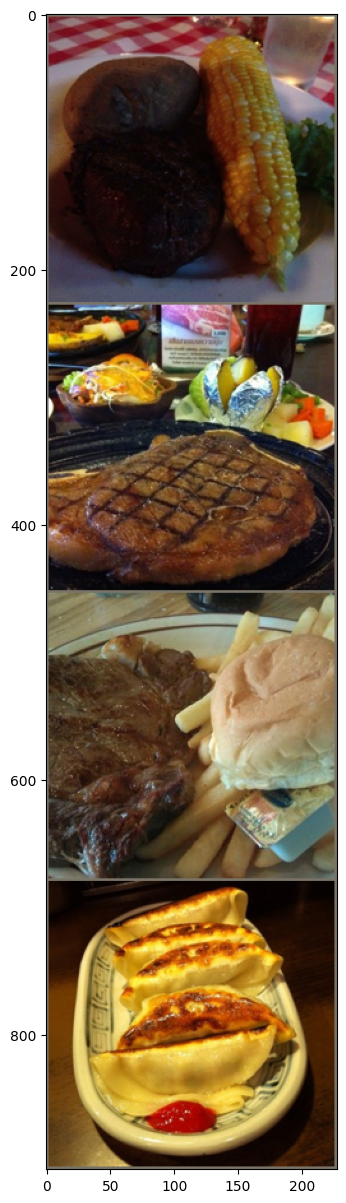

['filet_mignon', 'prime_rib', 'steak', 'gyoza']


In [7]:
from run_experiment import id_to_class_map

images_all = []
labels_all = []

for sample_at, score in our_top_4_info:
    images, labels, idx = testloader_with_idxs.dataset[sample_at]

    images_all.append(images)
    labels_all.append(labels)

# show images
plt.rcParams["figure.figsize"] = (20,15)
imshow(torchvision.utils.make_grid(images_all, 1))
print([id_to_class_map[label] for label in labels_all])

#### Show Score Breakdown
Show the score breakdown by descriptor for each of the top-4 scoring images

In [9]:
from investigate_tests import evaluate # modified evaluate()
                                        # function from the
                                        # run_experiment module's
                                        # eponymous function

# Copy and paste in the discriptors list used in the test of interest
attributes = [
                "Various BBQ items",
                "Grilled food",
                "Steakhouses",
                "Burgers",
                "Stews"
            ]

for sample_at, score in our_top_4_info:
    images, labels, idx = testloader_with_idxs.dataset[sample_at]

    evaluate(images, attributes, model, device)

    print("===================")


Score 'Various BBQ items' = 24.375
Score 'Grilled food' = 27.734375
Score 'Steakhouses' = 28.015625
Score 'Burgers' = 25.25
Score 'Stews' = 24.109375
Average Score 25.89
Score 'Various BBQ items' = 27.6875
Score 'Grilled food' = 29.328125
Score 'Steakhouses' = 28.390625
Score 'Burgers' = 24.375
Score 'Stews' = 23.171875
Average Score 26.6
Score 'Various BBQ items' = 26.46875
Score 'Grilled food' = 28.109375
Score 'Steakhouses' = 27.203125
Score 'Burgers' = 26.03125
Score 'Stews' = 23.46875
Average Score 26.25
Score 'Various BBQ items' = 27.375
Score 'Grilled food' = 28.65625
Score 'Steakhouses' = 23.796875
Score 'Burgers' = 25.734375
Score 'Stews' = 25.203125
Average Score 26.16
